In [85]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [86]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import pandas_to_fits, fits_to_pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Chandra/XMM with DESI 

,srcname_fin,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_sigma,csc_pos_r98,csc_FLUX_05_2,csc_flux_aper_sm_err,csc_likelihood,csc_likelihood_class,sep_ero_csc,sep_csc_desi,release,brickid,objid,ra,dec,desi_id,IDSRC_desi_id,ero_flux_05-20,ero_pos_r98,ero_pos_sigma_2d,ero_RA_fin,ero_DEC_fin,ero_DET_LIKE_0,csc_ero_flux_ratio
0,SRGe J105316.7+573551,2CXO J105316.7+573550,163.319906,57.597453,0.712676,0.711335,0.411369,1.150662,NaN,NaN,15055.956674,TRUE,0.970884,0.144735,9011,609950,3809,163.319852,57.597425,9011_609950_3809,SRGe J105316.7+573551_9011_609950_3809,1.327770e-13,2.276231,0.813768,163.319421,57.597379,2174.8645,NaN
1,SRGe J105335.1+572543,2CXO J105335.0+572541,163.395863,57.428329,0.740180,0.718313,0.421378,1.178657,NaN,NaN,5957.706781,TRUE,1.062877,0.241237,9011,609951,491,163.395958,57.428372,9011_609951_491,SRGe J105335.1+572543_9011_609951_491,7.887368e-14,2.442085,0.873062,163.396337,57.428477,1026.8735,NaN
2,SRGe J105432.1+580046,2CXO J105432.2+580047,163.634353,58.013174,0.856368,0.759133,0.467532,1.307756,0.0,1.382023e-14,654.613560,TRUE,1.697386,0.261635,9011,611496,691,163.634295,58.013108,9011_611496_691,SRGe J105432.1+580046_9011_611496_691,6.718623e-14,2.608968,0.932724,163.633625,58.012903,942.2203,0.0


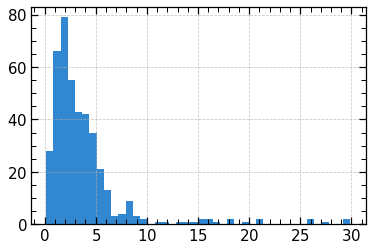

In [87]:
csc_ctps = pd.read_csv(data_path+'ero_csc_desi.csv')
plt.hist(csc_ctps.sep_ero_csc)
csc_ctps.head(3)

,srcname_fin,xmm_SRCID,xmm_SC_RA,xmm_SC_DEC,xmm_SC_POSERR,xmm_sigma,xmm_pos_r98,xmm_FLUX_05_2,xmm_FLUX_05_2_err,xmm_SC_DET_ML,xmm_SC_VAR_FLAG,xmm_SC_SUM_FLAG,xmm_SC_EXT_ML,xmm_SC_EXTENT,xmm_SC_EXT_ERR,xmm_SC_FVAR,xmm_SC_FVARERR,xmm_CONFUSED,sep_ero_xmm,sep_xmm_desi,release,brickid,objid,ra,dec,desi_id,IDSRC_desi_id,ero_flux_05-20,ero_pos_r98,ero_pos_sigma_2d,ero_RA_fin,ero_DEC_fin,ero_DET_LIKE_0,xmm_ero_flux_ratio
0,SRGe J104117.7+584929,205562112010003,160.324685,58.824762,0.817968,0.580060,1.622515,8.770400e-14,6.519681e-15,742.578,False,0,-2.27685,0.0,NaN,0.012697,1.426367,False,2.015272,0.975167,9011,613766,43,160.324219,58.824639,9011_613766_43,SRGe J104117.7+584929_9011_613766_43,1.817271e-13,2.166339,0.774481,160.323629,58.824642,3391.8890,0.482614
1,SRGe J103618.3+581246,205562110010001,159.076917,58.213093,0.568896,0.403431,1.128458,1.677284e-13,8.215893e-15,1899.140,False,0,-2.90832,0.0,NaN,0.087740,0.112042,False,1.987860,1.384893,9011,612250,2743,159.076381,58.212831,9011_612250_2743,SRGe J103618.3+581246_9011_612250_2743,1.704142e-13,2.166670,0.774599,159.076205,58.212688,3020.2393,0.984240
2,SRGe J105316.7+573551,201237001010003,163.319955,57.597429,0.077942,0.055272,0.154605,9.493300e-14,5.897774e-16,20363.300,False,1,-2.54092,0.0,NaN,0.306044,0.073647,False,1.045047,0.199473,9011,609950,3809,163.319852,57.597425,9011_609950_3809,SRGe J105316.7+573551_9011_609950_3809,1.327770e-13,2.276231,0.813768,163.319421,57.597379,2174.8645,0.714981


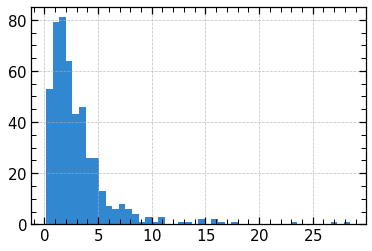

In [88]:
xmm_ctps = pd.read_csv(data_path+'ero_xmm_desi.csv')
plt.hist(xmm_ctps.sep_ero_xmm)
xmm_ctps.head(3)

flux ratio filter

In [89]:
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] <  5 ]
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] >  1/5 ]

csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] <  5 ]
csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] >  1/5 ]

distance filter

In [90]:
#csc_ctps = csc_ctps.query('sep_ero_csc < ero_pos_r98')[['srcname_fin','desi_id', 'sep_xmm_desi',]]
#xmm_ctps = xmm_ctps.query('sep_ero_xmm < ero_pos_r98 ')[['srcname_fin','desi_id', sep_csc_desi',]]
xmm_ctps = xmm_ctps[['srcname_fin','desi_id', 'sep_xmm_desi']]
csc_ctps = csc_ctps[['srcname_fin','desi_id', 'sep_csc_desi']]

In [92]:
finall_ctps = pd.concat([xmm_ctps, csc_ctps])
finall_ctps.sort_values(by='srcname_fin', inplace=True)

n_ctps = finall_ctps.groupby('srcname_fin')['desi_id'].transform(lambda x: len(x.unique())) #Number of XMM and Chandra CTPs per ero source
finall_ctps['n_desi'] = n_ctps

finall_ctps = finall_ctps[finall_ctps.n_desi == 1]
finall_ctps.drop_duplicates(subset='srcname_fin', inplace=True)
finall_ctps.rename(columns={'srcname_fin':'ID'}, inplace=True)
finall_ctps.rename(columns={'desi_id':'desi_id_true_ctp'}, inplace=True)
finall_ctps.drop(['n_desi'], axis=1, inplace=True)
#finall_ctps.ID = finall_ctps.ID.str.encode('utf-8')
#finall_ctps.desi_id_true_ctp = finall_ctps.desi_id_true_ctp.str.encode('utf-8')
# merge sep_xmm_desi and sep_csc_desi to one column
finall_ctps.loc[:,'sep_xray'] = finall_ctps.sep_xmm_desi.where(~finall_ctps.sep_xmm_desi.isnull(), finall_ctps.sep_csc_desi)
finall_ctps.drop(['sep_xmm_desi', 'sep_csc_desi'], axis=1, inplace=True)
#add hostless
hostless_ero = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh_hostless.pkl')
#finall_ctps.to_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')

finall_ctps = pd.concat([finall_ctps, hostless_ero])
print(len(finall_ctps))
finall_ctps.sample(20)


716


,ID,desi_id_true_ctp,sep_xray
351,SRGe J105302.4+573758,9011_610726_412,0.113267
101,SRGe J105051.2+570119,9011_608384_684,0.515812
431,SRGe J105545.0+573103,9011_609952_907,0.450338
136,SRGe J103839.4+580550,9011_611487_2843,1.088740
109,SRGe J103512.0+584527,9011_613762_3239,0.901508
302,SRGe J103242.6+575621,9011_611484_2129,0.352370
244,SRGe J104542.6+590700,9011_614516_1823,0.233250
118,SRGe J103907.5+574921,9011_610718_2416,0.791691
417,SRGe J104719.4+572948,9011_609947_3150,1.106868
166,SRGe J104129.3+592455,9011_615994_3594,1.324055


In [93]:
pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_orig.pkl')

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH
0,SRGe J103744.3+571156,159.434594,57.198788,151.771105,51.782607,2.041112,26414.902344,3.284168e-12,3.904461e-13,15460.503906,1838.058594,4300.765625,0.000000,0.000000,0.000000,1,1,159.436603,57.197499,0.318530,6.785297,0.000011,6.268413e+08,6.270701e+08,0.00000,0.000000,3.594826,0.427379,20.898417,159.434594,57.198788,853989860956388736,6.040749,1,0,15.749939,-1.0,0,87GB 103431.3+572750,0.830700,BLLac,6.040664,4,1,1,1,12.218000,11.328000,9.144,46.2,51.7,34.4,1,3,1,1237658303278743603,7980433077213351936,6.099201,65741514189,0.318530,0.729711,1.101567,1.786149,134.901685,44.066998,2.527295e-12,5.451755e+19
1,SRGe J110137.5+572926,165.406353,57.490464,147.861359,53.996717,2.144203,5344.646973,1.969860e-12,5.570020e-14,1436.945923,40.631405,666.426941,0.000000,0.000000,0.000000,21,14,165.408362,57.489175,0.433455,41.040825,0.000030,6.268413e+08,6.270701e+08,0.00000,0.000000,2.156194,0.060969,4.025409,165.406353,57.490464,857143329024245888,7.121849,2,1,10.012074,NaN,0,HD 237963,NaN,Star,7.105646,1,1,0,0,8.146000,8.155000,8.124,47.2,55.3,51.5,1,3,1,1237658302206378052,0,3.844748,64609311305,0.433455,0.766567,1.157204,1.876362,138.528408,46.042071,1.515884e-12,7.056474e+19
2,SRGe J105825.0+564723,164.604366,56.789762,149.231616,54.182274,11.631539,347.521820,1.817511e-12,9.707034e-14,1270.812012,67.872032,638.780701,38.636799,109.107346,2.316356,570,473,164.606375,56.788472,5.134762,81.047668,0.000027,6.268413e+08,6.270701e+08,2.26845,2.364263,1.989434,0.106252,60.279346,164.604366,56.789762,-1,-1.000000,0,-1,NaN,-1.0,-1,ACO 1132,0.135100,ClG,11.712927,1,1,1,0,17.020000,17.349001,12.590,10.7,2.3,0.9,2,0,-1,0,0,NaN,67345202611,5.134762,4.158354,6.277419,10.178598,138.559114,45.217538,1.398646e-12,8.566532e+19
3,SRGe J110537.6+585120,166.406669,58.855424,145.639441,53.356921,2.076665,9683.065430,1.505411e-12,9.148949e-14,3063.068848,186.154160,1858.869995,0.000000,0.000000,0.000000,7,4,166.408677,58.854134,0.361642,46.541451,0.000013,6.268413e+08,6.270701e+08,0.00000,0.000000,1.647812,0.100144,8.487207,166.406669,58.855424,860383349272777344,6.884830,3,0,16.935423,-1.0,0,2MASS J11053761+5851208,0.191000,Seyfert_1,6.883267,1,1,0,1,11.276000,10.261000,7.624,46.9,54.1,57.8,1,3,0,1237655108373839879,7996392488641515520,6.898202,59429013246,0.361642,0.742422,1.120754,1.817260,138.042449,47.467010,1.158473e-12,6.881141e+19
4,SRGe J102349.9+563347,155.958041,56.563186,154.343916,50.594493,2.027046,32979.832031,1.001123e-12,4.287407e-14,7451.697754,319.126190,6800.098145,0.000000,0.000000,0.000000,3,2,155.960049,56.561896,0.161150,96.801712,0.000004,6.268413e+08,6.270701e+08,0.00000,0.000000,1.095822,0.046930,29.139788,155.958041,56.563186,853150108949817088,6.997905,1,0,17.967112,-1.0,0,2MASX J10234977+5633475,0.230353,Seyfert_1,6.999458,1,1,0,1,12.966000,12.035000,9.582,44.0,48.8,32.1,1,1,0,1237655108371152952,9216701424834203648,6.968698,68241429703,0.300000,0.724683,1.093975,1.773840,133.091566,42.558086,7.704034e-13,7.963453e+19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,SRGe J102315.1+561957,155.813071,56.332561,154.718419,50.650679,12.277468,6.259035,1.637604e-15,6.023096e-16,14.734348,5.419283,8219.958008,0.000000,0.000000,0.000000,8816,7662,155.815079,56.331271,3.503645,66.729698,0.000003

In [94]:

ero_data = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_orig.pkl')[['srcname_fin','RA_fin','DEC_fin','pos_sigma_2d']]
ero_data.rename(columns={'srcname_fin':'ID'}, inplace=True)
ero_data.ID = ero_data.ID.str.encode('utf-8')
finall_ctps_errors = pd.merge(finall_ctps, ero_data, on='ID', how='left')
finall_ctps_errors

,ID,desi_id_true_ctp,sep_xray,RA_fin,DEC_fin,pos_sigma_2d
0,SRGe J103105.9+573747,9011_610714_1440,1.234494,NaN,NaN,NaN
1,SRGe J103118.8+574434,9011_610714_1908,1.160747,NaN,NaN,NaN
2,SRGe J103123.8+574309,9011_610714_2092,0.382428,NaN,NaN,NaN
3,SRGe J103130.8+573932,9011_610714_2412,0.309477,NaN,NaN,NaN
4,SRGe J103137.0+573159,9011_609939_1093,0.643303,NaN,NaN,NaN
...,...,...,...,...,...,...
711,b'SRGe J104633.7+555606',b'hostless',NaN,161.640488,55.934941,3.525383
712,b'SRGe J104646.4+585616',b'hostless',NaN,161.693470,58.937778,3.473279
713,b'SRGe J104410.7+585421',b'hostless',NaN,161.044430,58.905714,3.647680
714,b'SRGe J103158.3+573841',b'hostless',NaN,157.993098,57.644831,4.257094


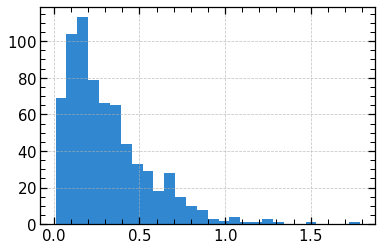

In [75]:
plt.hist(finall_ctps_errors.query('desi_id_true_ctp!=b"hostless"')['sep']/finall_ctps_errors.query('desi_id_true_ctp!=b"hostless"')['pos_sigma_2d']);

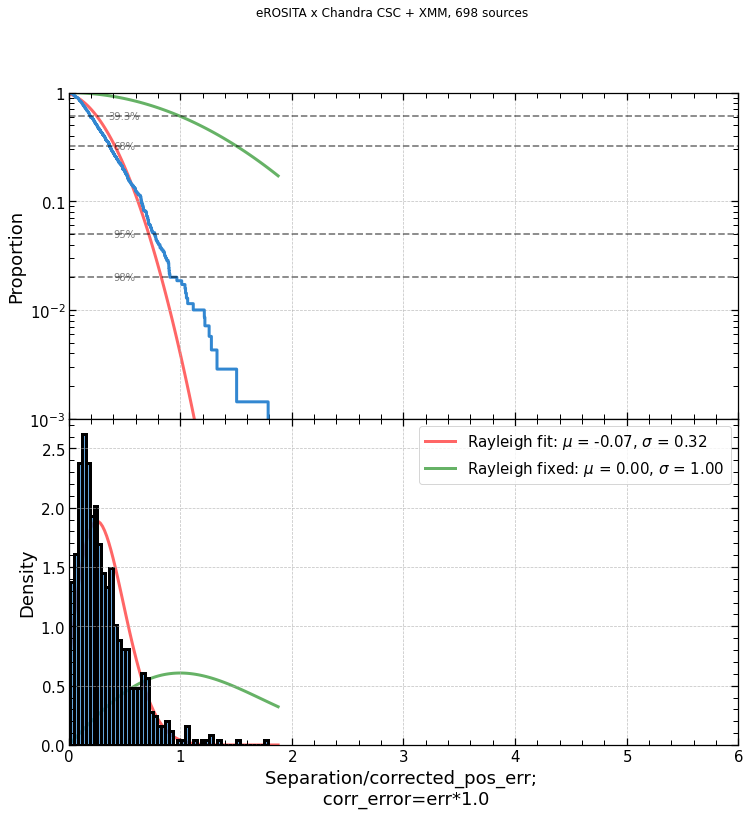

In [71]:
from scripts.cross_match_scripts import rayleigh_plot

rayleigh_plot(finall_ctps_errors.query('desi_id_true_ctp!=b"hostless"'), sep_col='sep', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM', xlim=(0, 6))


In [24]:
print(len(finall_ctps.query("desi_id_true_ctp!=b'hostless' & ~sep_xmm_desi.isna() & sep_csc_desi.isna()")))
print(len(finall_ctps.query("desi_id_true_ctp!=b'hostless' & sep_xmm_desi.isna() & ~sep_csc_desi.isna()")))
print(len(finall_ctps.query("desi_id_true_ctp!=b'hostless' & sep_xmm_desi.isna() & sep_csc_desi.isna()")))
print(len(finall_ctps.query("desi_id_true_ctp!=b'hostless'")))

435
262
0
697


In [ ]:
from scripts.cross_match_scripts import rayleigh_plot

rayleigh_plot(ctps_xray, sep_col='final_sep', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM', xlim=(0, 6))


# Only X-ray companions for eROSITA

In [18]:
ctps_xray = pd.read_csv(data_path+'ero_xmm_csc_30sec.csv')

def calc_xmm_csc_sep(row):
    ra_csc = 'csc_ra'
    dec_csc = 'csc_dec'
    err_csc = 'csc_pos_r98'
    ra_xmm = 'xmm_SC_RA'
    dec_xmm = 'xmm_SC_DEC'
    err_xmm = 'xmm_pos_r98'


    #calc_sep = (~pd.isna(row[ra_csc])) and (~pd.isna(row[ra_xmm]))
    #calc_sep = (~pd.isna(row[ra_csc])) * (~pd.isna(row[ra_xmm]))
    calc_sep = row[ra_csc] > 0 and row[ra_xmm] > 0
    if not calc_sep:
        row['sep_xmm_csc'] = np.nan
        row['sep_xmm_csc_is_sign'] = False
        if pd.isna(row[ra_xmm]):
            row['final_sep'] = row['sep_ero_csc']
        elif pd.isna(row[ra_csc]):
            row['final_sep'] = row['sep_ero_xmm']
        else:
            pass
        return row
        
    if calc_sep:
        mean_sq_err = (row[err_csc]**2 + row[err_xmm]**2)**0.5/2
        ra_diff = row[ra_csc] - row[ra_xmm]
        dec_diff = row[dec_csc] - row[dec_xmm]
        sep = (ra_diff**2 + dec_diff**2)**0.5
        #sep from deg to arcsec
        sep = sep*3600
        sep_is_sign = sep>mean_sq_err*2
        row['sep_xmm_csc'] = sep
        row['sep_xmm_csc_is_sign'] = sep_is_sign
        row['final_sep'] = row['sep_ero_csc']
        return row

ctps_xray['sep_xmm_csc'] = np.nan
ctps_xray['sep_xmm_csc_is_sign'] = False
ctps_xray['final_sep'] = np.nan
ctps_xray = ctps_xray.apply(lambda row: calc_xmm_csc_sep(row), axis=1)

ctps_xray = ctps_xray[ctps_xray['sep_xmm_csc_is_sign'] == False]
ctps_xray = ctps_xray.query('~pos_r98.isna()')
ctps_xray = ctps_xray.query('final_sep<10')
ctps_xray = ctps_xray.query('ero2csc_flux_ratio<5 | ero2xmm_flux_ratio<5')
ctps_xray = ctps_xray.query('ero2csc_flux_ratio>1/5 | ero2xmm_flux_ratio>1/5')


ctps_xray

,srcname_fin,RA_fin,DEC_fin,flux_05-20,pos_sigma_2d,pos_r98,DET_LIKE_0,EXT_LIKE,pos_r98_corr,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_sigma,csc_pos_r98,csc_flux_05_2,csc_flux_aper_sm_err,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_GroupID,csc_GroupSize,sep_ero_csc,ero2csc_flux_ratio,xmm_SRCID,xmm_SC_RA,xmm_SC_DEC,xmm_SC_POSERR,xmm_sigma,xmm_pos_r98,xmm_flux_05_2,xmm_flux_05_2_err,xmm_SC_DET_ML,xmm_SC_VAR_FLAG,xmm_SC_SUM_FLAG,xmm_SC_EXT_ML,xmm_SC_EXTENT,xmm_SC_EXT_ERR,xmm_SC_FVAR,xmm_SC_FVARERR,xmm_CONFUSED,xmm_GroupID,xmm_GroupSize,sep_ero_xmm,ero2xmm_flux_ratio,sep_xmm_csc,sep_xmm_csc_is_sign,final_sep
0,SRGe J110242.6+594120,165.677384,59.688978,1.420726e-13,2.736290,7.653812,211.181180,0.0,8.419194,2CXO J110242.8+594122,165.678600,59.689447,2.291189,2.008557,1.244794,3.481875,2.196054e-13,2.554235e-14,629.754672,TRUE,False,NaN,1.0,2.779278,0.646945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2.779278
1,SRGe J105316.7+573551,163.319421,57.597379,1.327770e-13,0.813768,2.276231,2174.864500,0.0,5.000000,2CXO J105316.7+573550,163.319906,57.597453,0.712676,0.711335,0.411369,1.150662,NaN,NaN,15055.956674,TRUE,False,NaN,1.0,0.970884,NaN,2.012370e+14,163.319955,57.597429,0.077942,0.055272,0.154605,9.493300e-14,5.897774e-16,20363.3000,False,1.0,-2.540920,0.0,NaN,0.306044,0.073647,False,NaN,1.0,1.045047,1.398639,0.197711,False,0.970884
3,SRGe J104144.5+594258,160.435424,59.716091,1.125101e-13,0.835654,2.337449,1862.223500,0.0,5.000000,2CXO J104144.8+594258,160.436809,59.716113,6.180927,6.180927,3.571101,9.988904,1.493810e-13,4.562363e-14,104.364506,TRUE,False,NaN,1.0,2.516922,0.753176,2.055621e+14,160.435401,59.715994,0.594453,0.421555,1.179152,1.324608e-13,6.995087e-15,2003.7300,False,0.0,-2.710570,0.0,NaN,0.015899,0.549870,False,NaN,1.0,0.351432,0.849384,5.089220,False,2.516922
4,SRGe J105429.0+575203,163.620843,57.867397,1.107308e-13,0.853295,2.386794,1758.452100,0.0,5.000000,2CXO J105429.1+575202,163.621560,57.867469,0.968371,0.812312,0.516377,1.444382,7.095109e-14,1.508598e-14,345.444575,TRUE,False,NaN,1.0,1.397154,1.560664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1.397154
5,SRGe J105639.5+575721,164.164459,57.955732,7.981506e-14,0.962116,2.691182,1081.418600,0.0,5.000000,2CXO J105639.6+575726,164.165312,57.957463,8.699230,6.765848,4.502339,12.593715,4.240228e-14,1.575570e-14,29.210599,TRUE,False,NaN,1.0,6.439647,1.882329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,6.439647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,SRGe J105729.0+573922,164.370932,57.656079,2.462788e-15,3.386683,9.473058,7.259020,0.0,10.420364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.060603e+14,164.372405,57.655527,1.496010,1.060892,2.967474,2.459770e-15,6.839306e-16,18.3006,NaN,0.0,-0.750795,0.0,NaN,NaN,NaN,False,NaN,1.0,3.462272,1.001227,NaN,False,3.462272
1117,SRGe J104437.2+593126,161.154875,59.523770,2.422125e-15,3.094132,8.654750,6.360213,0.0,9.520225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.055621e+14,161.156622,59.522768,1.410030,0.999920,2.796925,6.330540e-15,1.506756e-15,38.1722,NaN,0.0,-0.996143,0.0,NaN,NaN,NaN,False,NaN,1.0,4.815319,0.382610,NaN,False,4.815319
1118,SRGe J104614.0+585942,161.558429,58.995032,2.399448e-15,4.287310,11.992247,6.614729,0.0,13.191472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.055412e+14,161.556281,58.994787,0.338216,0.239845,0.670883,9.524310e-15,4.703719e-16,487.1030,False,1.0,-1.433390,0.0,NaN,0.290614,0.116905,False,NaN,1.0,4.079490,0.251929,NaN,False,4.079490
1119,SRGe J104939.7+590758,162.415404,59.132889,2.343887e-15,3.250494,9.092117,7.194517,0.0,10.001329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [19]:
#ctps_xray.query("srcname_fin=='SRGe J103557.8+562802'")

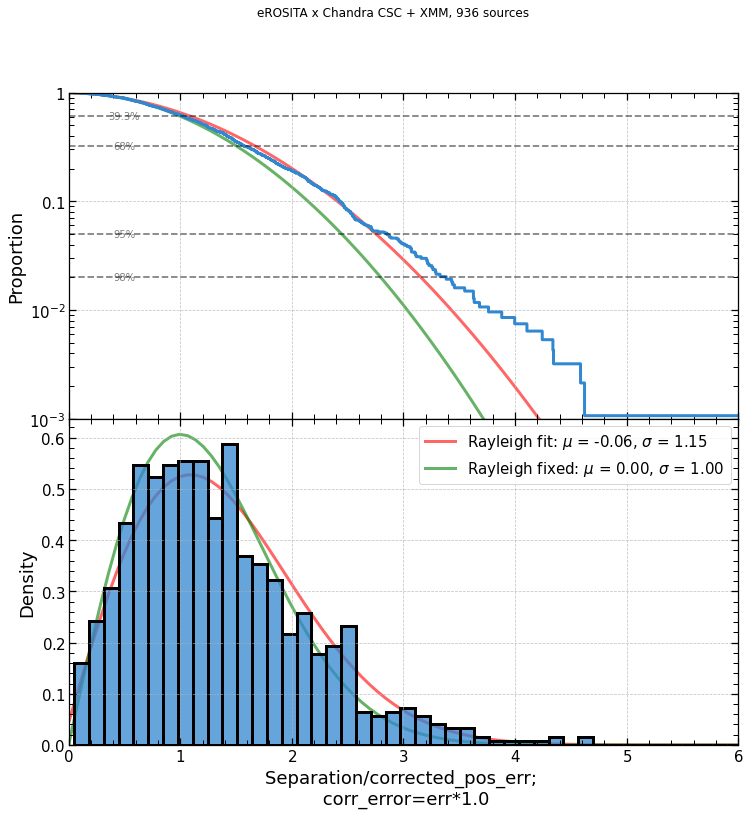

In [21]:
from scripts.cross_match_scripts import rayleigh_plot

rayleigh_plot(ctps_xray, sep_col='final_sep', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM', xlim=(0, 6))
